In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cusum(data, threshold=1.0):
    """
    Cumulative Sum (CUSUM) algorithm for change point detection.
    
    Parameters:
        data (array-like): Input data for change point detection.
        threshold (float): Threshold for change detection.
    
    Returns:
        array: Detected change points.
    """
    data = np.asarray(data)
    change_points = [0]  # List to store detected change points
    s = 0.0  # Cumulative sum
    for i in range(1, len(data)):
        s = max(0, s + data[i] - data[i - 1] - threshold)
        if s >= threshold:
            change_points.append(i)
            s = 0.0  # Reset sum after detecting change point
    return np.array(change_points)


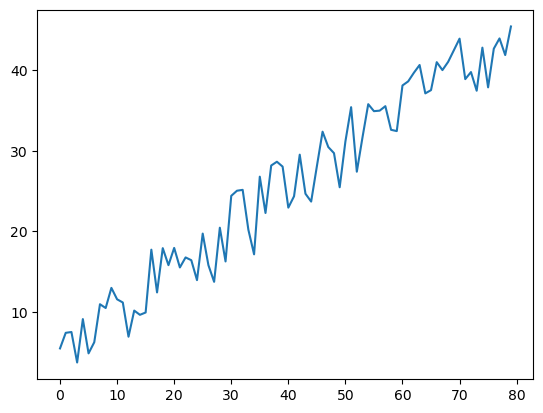

In [16]:
data = np.arange(0, 40, 0.5) + 10*np.random.rand(80)
plt.plot(data)

In [14]:

# Generate sample data with a change point
# np.random.seed(42)
# n = 100
# data = np.concatenate([np.random.normal(0, 1, n // 2), np.random.normal(3, 1, n // 2)])



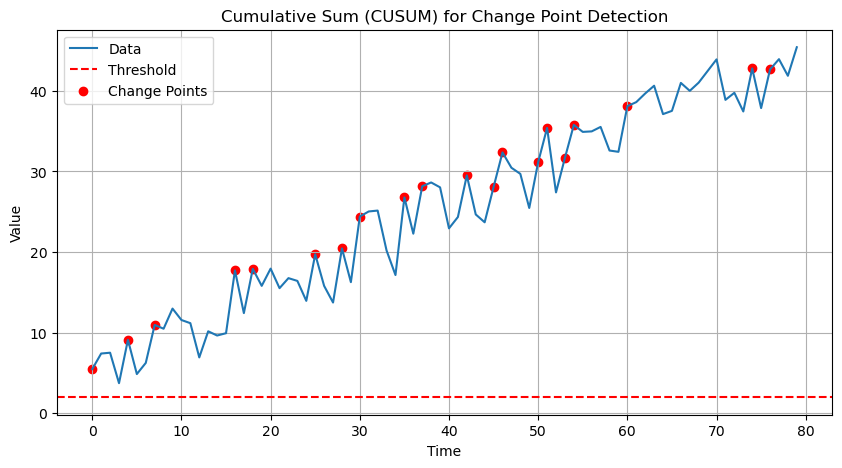

Detected change points: [ 0  4  7 16 18 25 28 30 35 37 42 45 46 50 51 53 54 60 74 76]


In [17]:
# Apply CUSUM algorithm
threshold = 2.0  # Adjust threshold as needed
change_points = cusum(data, threshold=threshold)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data, label='Data')
plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
plt.scatter(change_points, data[change_points], color='red', label='Change Points')
plt.title('Cumulative Sum (CUSUM) for Change Point Detection')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("Detected change points:", change_points)